<a href="https://colab.research.google.com/github/tacerihsehc613/ML-board/blob/main/Entropy_Theoritical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install treelib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
from treelib import Node, Tree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for treelib: filename=treelib-1.6.1-py3-none-any.whl size=18385 sha256=48fdf08f310c0b65cff950328f2a4b600b4aaa1c8ede752fabbee4bf49b01147
  Stored in directory: /root/.cache/pip/wheels/89/be/94/2c6d949ce599d1443426d83ba4dc93cd35c0f4638260930a53
Successfully built treelib


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


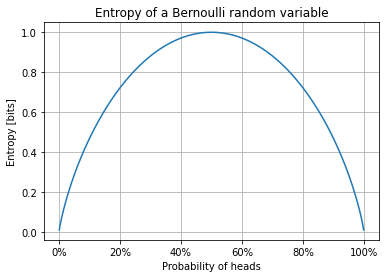

In [ ]:
# Domain of the parameter p of a Bernoulli rv: p ∈ [0, 1]
p = np.linspace(0, 1, 1000)

def xln2x(x):
    """ Computes x * log_2(x) in a safe way."""
    # If x is not a numpy array, it becomes one
    if not isinstance(x, np.ndarray):
        x = np.array(x)
    # STUDENT CODE:
    P0 = x
    P1 = 1 - P0
    H = - P0 * np.log2(P0) - P1 * np.log2(P1)
    return H

# STUDENT CODE:
# Use the entropy formula you found in Step 1 above.
entropy = xln2x(p)

plt.figure()
plt.title("Entropy of a Bernoulli random variable")
plt.plot(p, entropy)
plt.xlabel("Probability of heads")
plt.gca().get_xaxis().set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Entropy [bits]")
plt.grid()
plt.show()

In [ ]:
import math
def binary_entropy(seq):
  """ Returns the empirical entropy of a sequence.
  Input values should contain only 0s and 1s."""
  # If seq is not a numpy array, it becomes one
  if not isinstance(seq, np.ndarray):
    seq = np.array(seq)
  # STUDENT CODE:
  prob_dict = {}
  classes = set(seq)
  total_samples = len(seq)
  for i in classes: 
    count = (seq==i).sum()
    #print ("class = ",i, "count = ", count)
    prob_dict[i] = count/total_samples
  total_entropy = 0.0
  for i in classes:
    total_entropy += -1 * (prob_dict[i]) * math.log2 ( prob_dict[i])
  return total_entropy

assert binary_entropy([0]) == 0, "Failed test 1"
assert binary_entropy([0, 1]) == 1, "Failed test 2"
assert binary_entropy([0]*10 + [1]*10) == 1, "Failed test 3"
assert np.abs(binary_entropy([0] + [1]*8) - 0.50326) < 1e-5, "Failed test 4"
assert binary_entropy([]) == 0, "Failed test 5"

In [ ]:
# Download and load the dataset into pandas
dataset_url = "https://raw.githubusercontent.com/earthtojake/20q/master/data/small.csv"
# There is a bigger dataset at
#dataset_url = "https://raw.githubusercontent.com/earthtojake/20q/master/data/big.csv"
df = pd.read_csv(dataset_url, index_col=0) 
df.head()

,is it warm blooded?,can it fly?,is it a vertebrate?,is it endangered?,does it live in groups?,does it have hair?
ant,0,0,0,0,1,0
bee,0,1,0,0,1,1
cat,1,0,1,0,0,1
cpl,0,0,0,0,0,1
duck,1,1,1,0,1,0


In [ ]:
tree = Tree()
tree.create_node("Root", "root")  # root node

def generate_tree(data, tree, branch="", parent="root"):
    """Populates the tree with questions and candidate animals.
    
    Args:
        data: The dataset to use
        tree: The tree to populate
        branch: '+' if the previous condition was true, '-' otherwise.
        parent: The parent node, so that we can attach children nodes to it.
    
    Note: Treelib sorts the name of the nodes by alphabetical order, its important
    to name the nodes such that the first one is the result of a positive condition,
    the second one, the negative condition. This has been taken care of if you use
    the code template by naming the node "+something" and "-something" (In ASCII, +
    (42) is before - (45)).
    """
    # STUDENT CODE:
    # Find the column with the highest entropy
    entropies = []
    for i in range(0,len(data.columns)):
      entropies.append(binary_entropy(data.iloc[:,i]))
    # The columns with a null entropy can be removed
    entropies=np.array(entropies)
    if 0 in entropies:
      loc_0=np.where(entropies==0)
      data.drop(data.columns[loc_0], axis=1, inplace=True)
    # If there aren't any columns left to discriminate the animals, we stop
    # If there is only one animal and plenty of columns, we also stop
    no_column_left = len(data.columns)==0
    one_animal_left = len(data.index)==1 and len(data.columns)>=2
    if no_column_left or one_animal_left:
        tree.create_node(branch+", ".join(data.index), parent=parent)
        return
    # If we are here, it means the data can be split some more.
    # entropies might have more columns than the current data, since
    # we removed some columns.
    for i in entropy:
      if(i==0):
        entropy.remove(0)
    # We find the column with the highest entropy
    max_col=np.argmax(entropy)
    selected_column=data.columns[max_col]
    # We add the column to the tree under the current parent
    node = tree.create_node(branch + selected_column, parent=parent)
    # we split the data by column and remove the said column
    
    mask=data.iloc[:,max_col] == 1

    # We generate the branches **recursively**
    # If the answer to the question was "yes"
    generate_tree(data[mask], tree, branch="+", parent=node)
    # If the answer to the question was "false"
    generate_tree(data[~mask], tree, branch="-", parent=node)

# The tree is generated
generate_tree(df, tree)
# The tree is plotted
tree.show()

Root
└── is it warm blooded?
    ├── +can it fly?
    │   ├── +is it endangered?
    │   │   ├── +eagle
    │   │   └── -duck
    │   └── -is it endangered?
    │       ├── +does it have hair?
    │       │   ├── +man
    │       │   └── -elephant
    │       └── -does it live in groups?
    │           ├── +rabbit
    │           └── -cat
    └── -can it fly?
        ├── +does it live in groups?
        │   ├── +bee
        │   └── -fly
        └── -is it a vertebrate?
            ├── +does it live in groups?
            │   ├── +her
            │   └── -lizard
            └── -does it live in groups?
                ├── +ant
                └── -cpl



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print("Depth of the tree:", tree.depth())

Depth of the tree: 5


In [ ]:
# No need to add code here!
# Just run this and enjoy :)
def ask_yesno(question):
    """Checks that the written answer is valid. Iterates otherwise."""
    while True:
        answer = input(question + " ").lower().strip()
        if answer == "y" or answer == "yes":
            return True
        if answer == "n" or answer == "no":
            return False
        print("Just answer 'yes' or 'no'.")

print("Pick an animal!")
print()

question = tree.children("root")[0]
while True:
    # Have we found the answer?
    if question.is_leaf():
        print("I think you chose a " + question.tag)
        break
    # Otherwise we keep asking
    answer = ask_yesno(question.tag)
    children = tree.children(question.identifier)
    question = children[0] if answer else children[1]

Pick an animal!

is it warm blooded? yes
+can it fly? no
-is it endangered? no
-does it live in groups? no
I think you chose a -cat
